In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
house_price = pd.read_csv('house_price.csv')
house_price.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# dataset info
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# int64 columns
int_columns = ["OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath",
"FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars"]

# datetime columns
datetime_columns = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
# the fact is columns only contain year or month, we can treat this as integer later

# float64 columns
float_columns = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1",
"BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
"GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
"3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

# ordinal columns (dtype is equal to object/categoric, but these are actually ordinal features)
ordinal_columns = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
"BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", "GarageFinish",
"GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence"]

# categorical columns
obj_columns = ["MSSubClass", "MSZoning", "Alley", "Street", "LotShape", "LandContour",
"Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
"Condition2", "BldgType", "HouseStyle", "OverallQual", "RoofStyle",
"RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual",
"ExterCond", "Foundation", "Heating", "Electrical", "Functional", "FireplaceQu",
"GarageType", "MiscFeature", "SaleType", "SaleCondition"]

# target column
target_column = ["SalePrice"]

In [ ]:
# viewing columns for each data type
house_price.select_dtypes('int').columns.tolist()

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# **Missing Value**

In [ ]:
# sum all missing value in dataset and keep only columns with missing value > 0
missing = house_price.isnull().sum()[house_price.isnull().sum()>0]

# construct a dataframe consist of NaN count and Nan percentage from the dataset
missing_house_price = pd.DataFrame({'NaN_count':missing,
                                    'NaN_percentage':missing/len(house_price)}).sort_values(by = 'NaN_percentage', ascending = False)
missing_house_price

,NaN_count,NaN_percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Based on the original data source (see:https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques), each column in the dataset has been defined. Therefore, according to this definition, some columns contain NA (missing values) that are not actually missing but instead indicate "Not Available"(hereafter referred to as legit NA).

Based on the source, the information regarding NA values is as follows:  

- **NA in the "PoolQC" column** means the house has no pool. It does not indicate a missing value.  
- **NA in the "MiscFeature" column** means the house has no additional features. It does not indicate a missing value.  
- **NA in the "Alley" column** means there is no alley connected to the house. It does not indicate a missing value.  
- **NA in the "Fence" column** means the house has no fence. It does not indicate a missing value.  
- **NA in the "Fireplaces" column** means the house has no fireplace. It does not indicate a missing value.  
- **NA in the "FireplaceQu" column** means there is no fireplace. It does not indicate a missing value.  
- There is **no explanation regarding NA values in the "LotFrontage" column**; therefore, we classify this as a missing value.  
- **NA in the "GarageType" column** means the house has no garage. It does not indicate a missing value.  
- Since houses without a garage would also lack information in the **"GarageFinish", "GarageYrBlt", "GarageQual", and "GarageCond"** columns, NA values in these columns should not be considered missing values.  
- **NA in the "BsmtQual", "BsmtFinType2", "BsmtFinType1", "BsmtCond", and "BsmtExposure" columns** means the house has no basement. It does not indicate a missing value.  
- **NA in the "MasVnrType" and "MasVnrArea" columns** means the house has no masonry veneer. It does not indicate a missing value.  
- There is **no explanation regarding NA values in the "Electrical" column**; therefore, we classify this as a missing value.  

Therefore, the handling of NA values in legit NA columns will be different from that in missing value columns.

**Missing Value Handling**

In [ ]:
# specify columns with legit na values
legit_na_values_columns = ["MasVnrArea", "MasVnrType", "BsmtExposure", "BsmtCond", "BsmtFinType1",
                          "BsmtFinType2", "BsmtQual", "GarageCond", "GarageQual",
                          "GarageFinish", "GarageType", "Fireplaces", "Fence", "Alley", "MiscFeature",
                          "PoolQC", "GarageYrBlt", "FireplaceQu"]

# how many columns with legit na values
len(legit_na_values_columns)

18

Separating columns by numeric and categorical data types.

In [ ]:
# specify columns with numeric dtypes
num_legit_na = [i for i in house_price[legit_na_values_columns].columns if house_price[i].dtype in ['int', 'float']]
num_legit_na

['MasVnrArea', 'Fireplaces', 'GarageYrBlt']

In [ ]:
# specify columns with categoric dtypes
cat_legit_na = [i for i in house_price[legit_na_values_columns].columns if house_price[i].dtype in ['object']]
cat_legit_na

['MasVnrType',
 'BsmtExposure',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'GarageCond',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'Fence',
 'Alley',
 'MiscFeature',
 'PoolQC',
 'FireplaceQu']

To prevent any unwanted issues, back up the original dataset.

In [ ]:
# copy the initial dataset to backup if any incident happens
house_price_handled = house_price.copy()

**Handling NA values in numeric columns by imputing 0**

In [ ]:
# handle missing value in datetime column by removing it
house_price_handled.dropna(subset=["GarageYrBlt"], inplace=True)

In [ ]:
# fill all legit na values in numeric columns with 0
house_price_handled[num_legit_na] = house_price_handled[num_legit_na].fillna(0)

In [ ]:
# check the filling result
house_price_handled[num_legit_na].isna().sum()

,0
MasVnrArea,0
Fireplaces,0
GarageYrBlt,0


**Handling NA values in categoric columns by imputing "not_exist"**

In [ ]:
# fill legit na values in cat columns with value "not_exist"
house_price_handled[cat_legit_na] = house_price_handled[cat_legit_na].fillna('not_exist')

In [ ]:
# check the filling result
house_price_handled[cat_legit_na].isna().sum()

,0
MasVnrType,0
BsmtExposure,0
BsmtCond,0
BsmtFinType1,0
BsmtFinType2,0
BsmtQual,0
GarageCond,0
GarageQual,0
GarageFinish,0
GarageType,0


Merge the data with handled missing values back into the original dataset.

In [ ]:
# merge the handled missing value dataframe with original one
house_price_merged = pd.merge(house_price, house_price_handled, how="right").copy()
house_price_merged

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,not_exist,IR1,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,not_exist,IR1,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,not_exist,IR1,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,1456,60,RL,62.0,7917,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,8,2007,WD,Normal,175000
1375,1457,20,RL,85.0,13175,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,MnPrv,not_exist,0,2,2010,WD,Normal,210000
1376,1458,70,RL,66.0,9042,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1377,1459,20,RL,68.0,9717,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,4,2010,WD,Normal,142125


In [ ]:
# sum all missing value in dataset and keep only columns with missing value > 0
missing = house_price_merged.isnull().sum()[house_price_merged.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_house_price = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(house_price)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_house_price

,NaN_count,NaN_percentage
LotFrontage,252,0.172603
Electrical,1,0.000685


**Handling real missing value**

In [ ]:
# descriptive statistics of LotFrontage
house_price_merged['LotFrontage'].describe()

,LotFrontage
count,1127.000000
mean,70.683230
std,24.261598
min,21.000000
25%,60.000000
50%,70.000000
75%,80.000000
max,313.000000


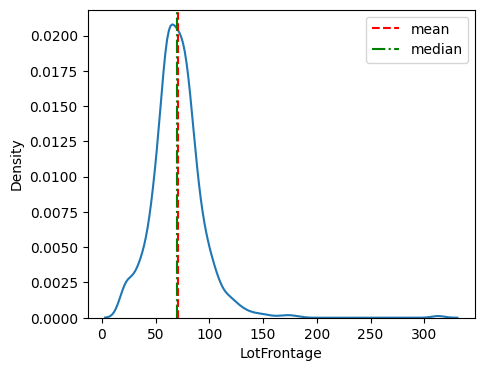

In [ ]:
# set pyplot figure, and define the pre-defined size
plt.figure(figsize=(5,4))

# plot seaborn kdeplot for LotFrontage
sns.kdeplot(data=house_price_merged, x='LotFrontage')

#draw vertical line to describe the mean
plt.axvline(x=house_price_merged.LotFrontage.mean(), color="r", linestyle="--", label="mean")

# draw vertical line to describe the median value
plt.axvline(x=house_price_merged.LotFrontage.median(), color="g", linestyle="-.", label="median")

# show the legend
plt.legend()

# show the whole graph
plt.show()

In [ ]:
# fill missing value in LotFrontage using median value
house_price_merged['LotFrontage'] = house_price_merged['LotFrontage'].fillna(house_price_merged['LotFrontage'].median())

In [ ]:
# sum all missing value in dataset and keep only columns with missing value > 0
missing = house_price_merged.isnull().sum()[house_price_merged.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_house_price = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(house_price)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_house_price

,NaN_count,NaN_percentage
Electrical,1,0.000685


Drop NaN in Electrical column

In [ ]:
# drp NaN in Eletrical Column
house_price_merged.dropna(subset=['Electrical'], inplace=True)

In [ ]:
# sum all missing value in dataset and keep only columns with missing value > 0
missing = house_price_merged.isnull().sum()[house_price_merged.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_house_price = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(house_price)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missin
missing_house_price

,NaN_count,NaN_percentage


# **Outliers**

**Detect and Handle Outlier using Box Plot**

In [ ]:
# select only numeric columns
colnames = int_columns+float_columns

# reset index
house_price_merged.reset_index(drop=True, inplace=True)

In [ ]:
# minimal subplot rows to make if we want 3 columns
import math
print(math.ceil(len(colnames)/3))

10


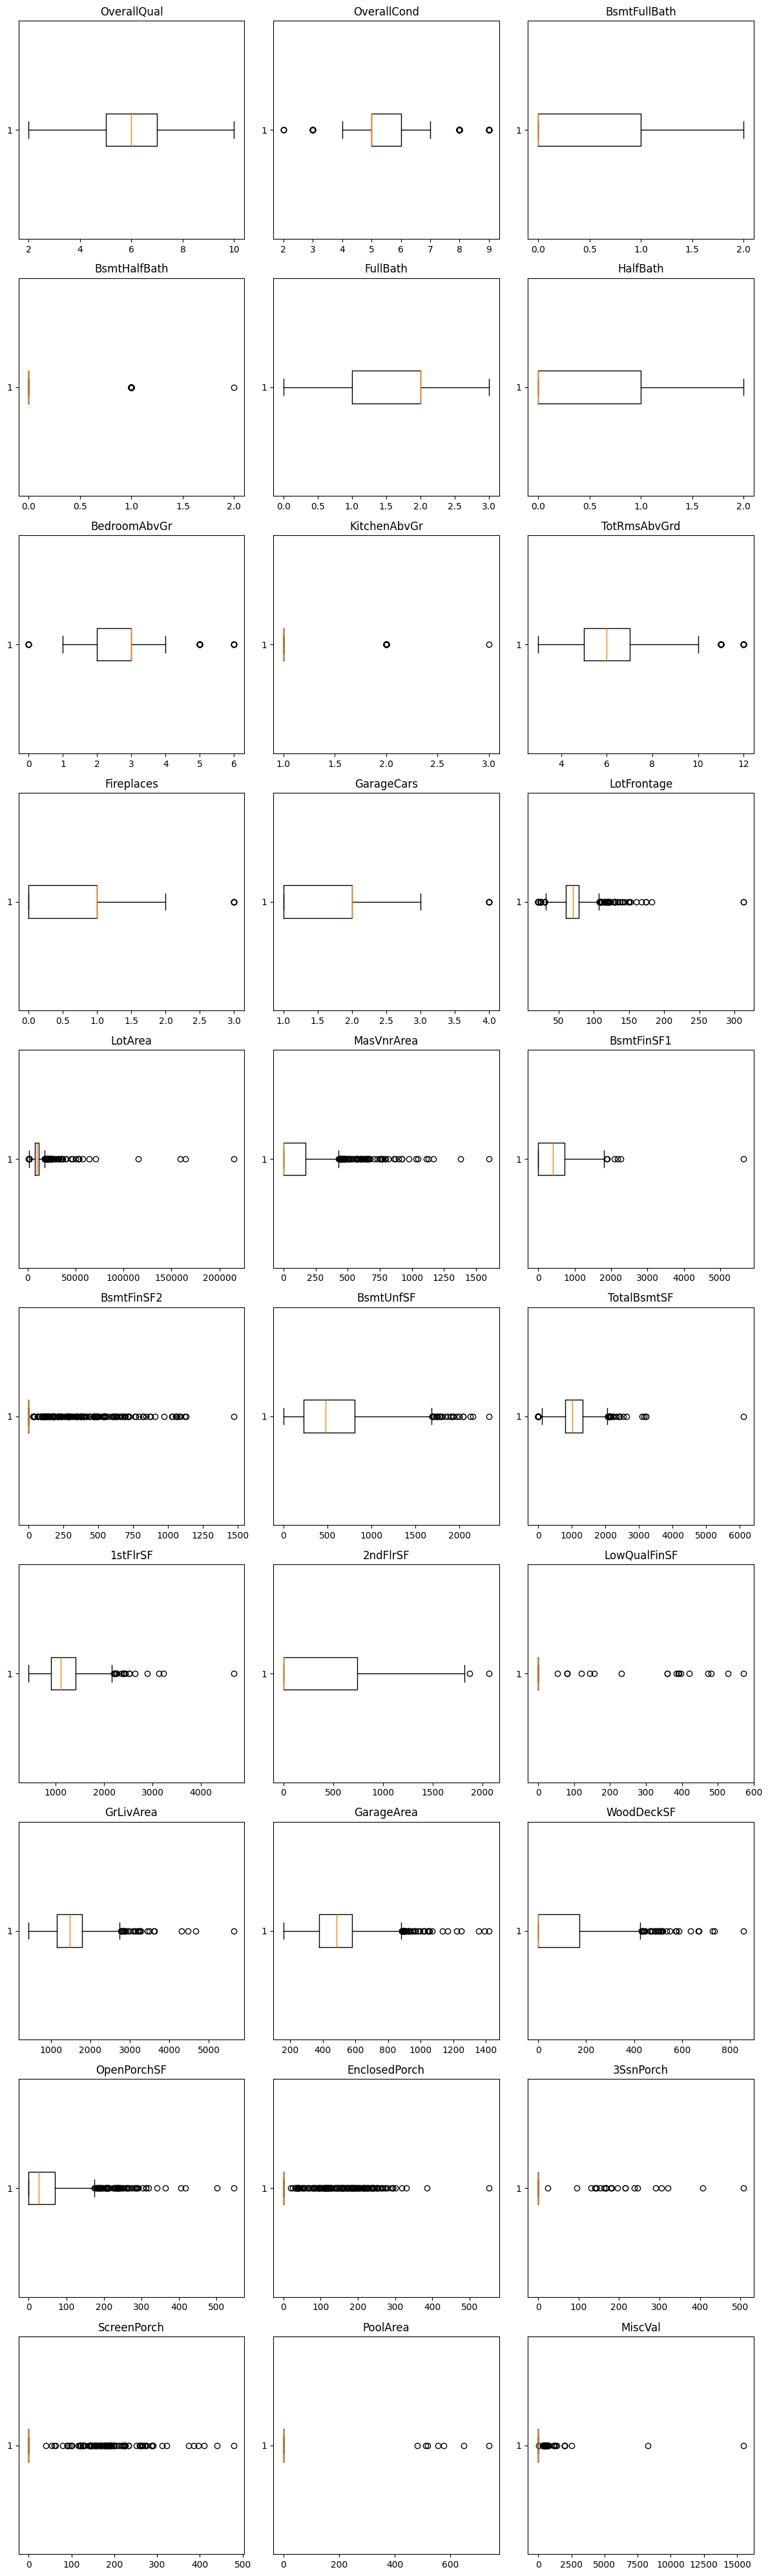

In [ ]:
# create subplots with 11x3 grids and size 12x30
fig, ax = plt.subplots(10, 3, figsize=(12,40))

# counter to select colnames
cnt = 0

# loop through the grids
for i in range(11):

    if cnt >= 30:
            break

    for j in range(3):

        if cnt >= 30:
            break

        # we use boxplot from pyplot
        ax[i, j].boxplot(house_price_merged[colnames[cnt]], vert=False)
        ax[i, j].set_title(str(colnames[cnt]), fontdict={'fontsize':12})

        # increment counter
        cnt = cnt+1

# make sure layout is not overlapping
fig.tight_layout()
# show the graphs
fig.show()

**Detect and Handle Outlier using IQR Filter**

In [ ]:
# function to detect outlier using IQR
def detect_outliers_iqr(data):

    # initialize list that contains the outliers
    outliers = []

    # sort data values
    data = sorted(data)

    # compute the q1
    q1 = np.percentile(data, 25)

    # compute the q3
    q3 = np.percentile(data, 75)

    # compute the IQR
    IQR = q3-q1

    # set the lower bound
    ## note that we can play with value 1.5 to widen or narrow the range
    lwr_bound = q1-(1.5*IQR)

    # set the upper bound
    ## note that we can play with value 1.5 to widen or narrow the range
    upr_bound = q3+(1.5*IQR)

    # print computed lower and upper bound of a particular column
    print("lower:",lwr_bound, "upper:", upr_bound)

    # for each data point, decide whether it falls below lower bound or above upper ground
    for i in data:

        if (i<lwr_bound or i>upr_bound):

            outliers.append(i)

    return outliers

In [ ]:
# put outlier columns (inferred from boxplot analysis above) in a list
outlier_columns = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF",
"2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch",
"PoolArea", "MiscVal"]

In [ ]:
for col in outlier_columns:

    outlier = detect_outliers_iqr(house_price_merged[col])

    print("number of outliers in column", f"'{str(col)}'", "is", len(outlier))
    print()

lower: 31.5 upper: 107.5
number of outliers in column 'LotFrontage' is 98

lower: 1782.125 upper: 17671.125
number of outliers in column 'LotArea' is 79

lower: -256.125 upper: 426.875
number of outliers in column 'MasVnrArea' is 86

lower: -1098.0 upper: 1830.0
number of outliers in column 'BsmtFinSF1' is 6

lower: 0.0 upper: 0.0
number of outliers in column 'BsmtFinSF2' is 163

lower: -647.75 upper: 1686.25
number of outliers in column 'BsmtUnfSF' is 26

lower: 54.625 upper: 2069.625
number of outliers in column 'TotalBsmtSF' is 54

lower: 114.0 upper: 2194.0
number of outliers in column '1stFlrSF' is 18

lower: -1108.125 upper: 1846.875
number of outliers in column '2ndFlrSF' is 2

lower: 0.0 upper: 0.0
number of outliers in column 'LowQualFinSF' is 19

lower: 200.0 upper: 2744.0
number of outliers in column 'GrLivArea' is 29

lower: 78.5 upper: 882.5
number of outliers in column 'GarageArea' is 46

lower: -256.5 upper: 427.5
number of outliers in column 'WoodDeckSF' is 30

lower: -

In [ ]:
# remove columns with lower and upper bound equal 0
outlier_columns=[out for out in outlier_columns if out not in ["BsmtFinSF2", "LowQualFinSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]]
outlier_columns

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [ ]:
len(outlier_columns)

12

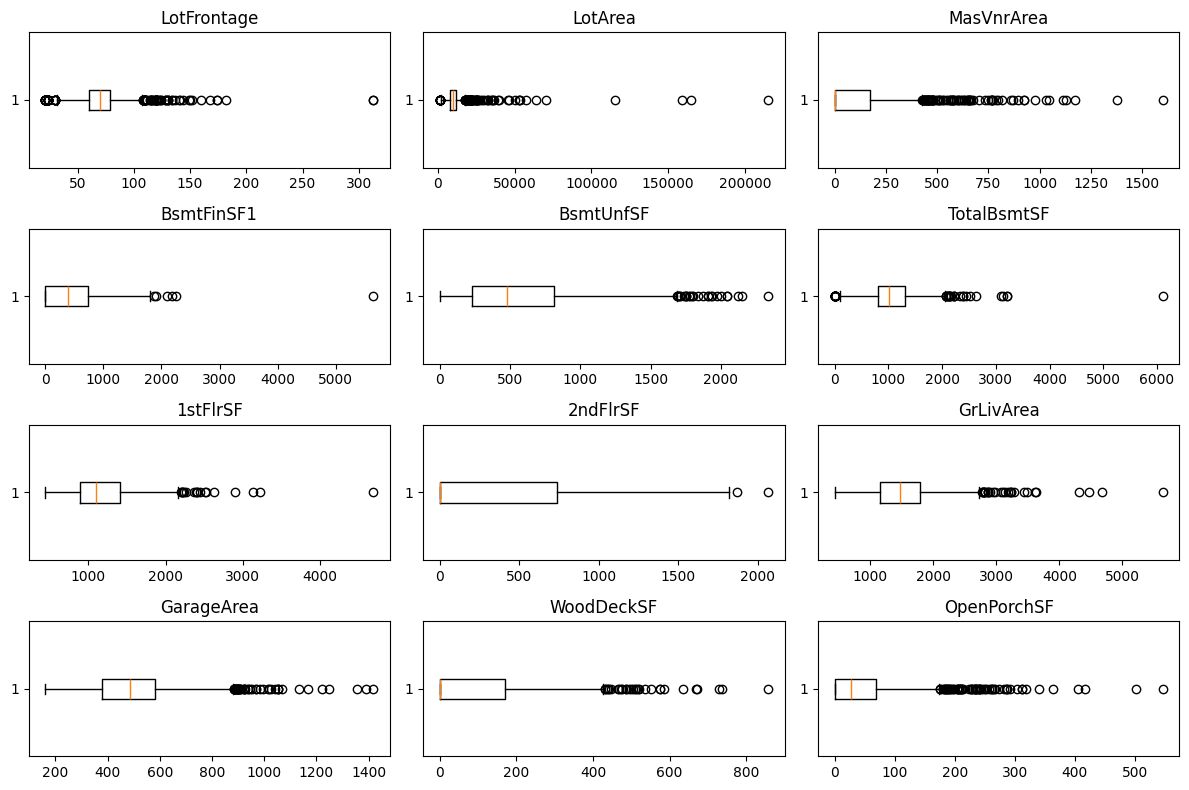

In [ ]:
# create subplots with 4x3 grids and size 12x30
fig, ax = plt.subplots(4, 3, figsize=(12,8))

# counter to select outlier_columns
cnt = 0

# loop through the grids
for i in range(4):

    if cnt >= 12:
            break

    for j in range(3):

        if cnt >= 12:
            break

        # we use boxplot from pyplot
        ax[i, j].boxplot(house_price_merged[outlier_columns[cnt]], vert=False)
        ax[i, j].set_title(str(outlier_columns[cnt]), fontdict={'fontsize':12})

        # increment counter
        cnt = cnt+1

# make sure layout is not overlapping
fig.tight_layout()
# show the graphs
fig.show()

**Handle outlier using capping method**

In [ ]:
import copy
# original data copy
house_price_capped = copy.deepcopy(house_price_merged)

In [ ]:
# create a function to filter outliers
def capping_outlier(col):

    # define the upper and lower bounds for outliers
    lwr_limit = house_price_capped[col].quantile(0.03)
    upr_limit = house_price_capped[col].quantile(0.97)

    print(str(col).upper())
    print("lwr:", lwr_limit, "upr:", upr_limit)
    print()

    # filter out the outliers
    house_price_capped[col] = np.where(house_price_capped[col]> upr_limit, upr_limit,
                                        np.where(house_price_capped[col]< lwr_limit, lwr_limit, house_price_capped[col]))

In [ ]:
for col in outlier_columns:

    capping_outlier(col)

LOTFRONTAGE
lwr: 30.61999999999999 upr: 114.0

LOTAREA
lwr: 2603.16 upr: 21750.0

MASVNRAREA
lwr: 0.0 upr: 582.4500000000003

BSMTFINSF1
lwr: 0.0 upr: 1386.69

BSMTUNFSF
lwr: 0.0 upr: 1592.1400000000003

TOTALBSMTSF
lwr: 384.0 upr: 1924.7600000000002

1STFLRSF
lwr: 630.0 upr: 1997.5200000000004

2NDFLRSF
lwr: 0.0 upr: 1254.0

GRLIVAREA
lwr: 833.62 upr: 2633.69

GARAGEAREA
lwr: 220.0 upr: 888.0

WOODDECKSF
lwr: 0.0 upr: 393.3800000000001

OPENPORCHSF
lwr: 0.0 upr: 213.69000000000005



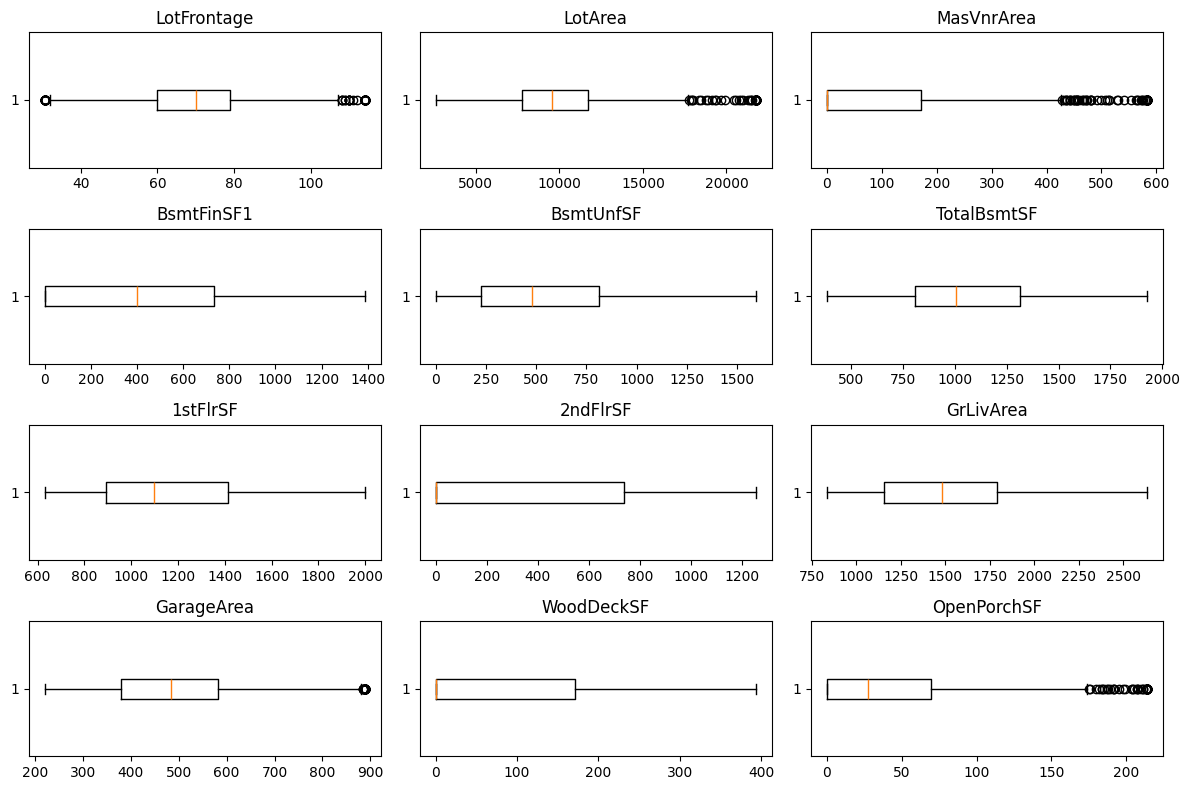

In [ ]:
# create subplots with 4x3 grids and size 12x30
fig, ax = plt.subplots(4, 3, figsize=(12,8))

# counter to select outlier_columns
cnt = 0

# loop through the grids
for i in range(4):

    if cnt >= 12:
            break

    for j in range(3):

        if cnt >= 12:
            break

        # we use boxplot from pyplot
        ax[i, j].boxplot(house_price_capped[outlier_columns[cnt]], vert=False)
        ax[i, j].set_title(str(outlier_columns[cnt]), fontdict={'fontsize':12})

        # increment counter
        cnt = cnt+1

# make sure layout is not overlapping
fig.tight_layout()
# show the graphs
fig.show()